# 04.11.01 Data exploration and feature extraction

## Task 1: Load images

Load the images from the three sets (train, validation, and test). Since the images will be fed to a pretrained model for feature extraction, make sure to set the scale of the pixels and the image size as expected by the model (you can check the expected scale and size in the official documentation page)

In [1]:
# import command
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image generator
generator = ImageDataGenerator(rescale=1/ 255)

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


_Consideration: The ImageDataGenerator specifies how to process each image. The model expects pixel values in [0, 1] not [0, 255]. Therefore I rescale them. I set the batch_size to the number of images in each dataset. The class_mode is 'sparse' in order to obtain integer encoded labels._

In [2]:
# import command
import os

# Train, validation and test sets
trainset = generator.flow_from_directory(
    os.path.join("resources/swissroads", "train"),
    target_size=(224, 224),
    color_mode="rgb",
    batch_size= 280,
    class_mode = 'sparse',
    shuffle=False)

validset = generator.flow_from_directory(
    os.path.join("resources/swissroads", "valid"),
    target_size=(224, 224),
    color_mode="rgb",
    batch_size= 139,
    class_mode = 'sparse',
    shuffle=False)

testset = generator.flow_from_directory(
    os.path.join("resources/swissroads", "test"), 
    target_size=(224, 224), 
    color_mode="rgb",
    batch_size= 50,
    class_mode = 'sparse',
    shuffle=False)


Found 280 images belonging to 6 classes.
Found 139 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


In [3]:
# Show some filenames
trainset.filenames[:3]

['bike/bike-0001.png', 'bike/bike-0002.png', 'bike/bike-0003.png']

In [4]:
# Show data type
type(testset)

keras.preprocessing.image.DirectoryIterator

## Task 2: Plot images

Plot a few images from each category (bike, car, motorcycle, other, truck, van).

In [5]:
# import commands
%matplotlib inline
import matplotlib.pyplot as plt
import PIL.Image as Image
from IPython.display import display

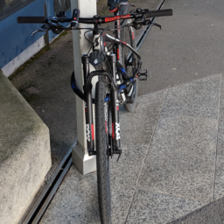

In [6]:
# Plot image
bike = Image.open("resources/swissroads/train/bike/bike-0001.png").resize(size=[224, 224])
display(bike)

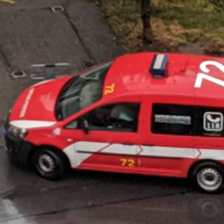

In [7]:
# Plot image
car = Image.open("resources/swissroads/train/car/car-0001.png").resize(size=[224, 224])
display(car)

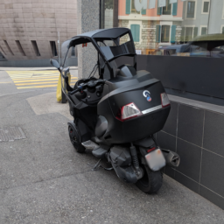

In [8]:
# Plot image
motorcycle = Image.open("resources/swissroads/train/motorcycle/motorcycle-0001.png").resize(size=[224, 224])
display(motorcycle)

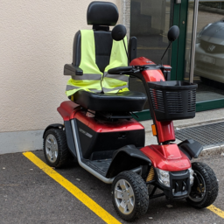

In [9]:
# Plot image
other = Image.open("resources/swissroads/train/other/other-0001.png").resize(size=[224, 224])
display(other)

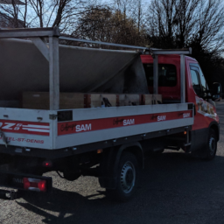

In [10]:
# Plot image
truck = Image.open("resources/swissroads/train/truck/truck-0001.png").resize(size=[224, 224])
display(truck)

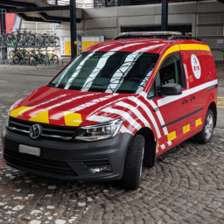

In [11]:
# Plot image
van = Image.open("resources/swissroads/train/van/van-0001.png").resize(size=[224, 224])
display(van)


## Task 3: Proportions

Use an appropriate visualization to show the proportions of each category in the three sets (train, validation, and test).

In [12]:
# class indices
trainset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

In [13]:
# import commands
from collections import Counter
import numpy as np

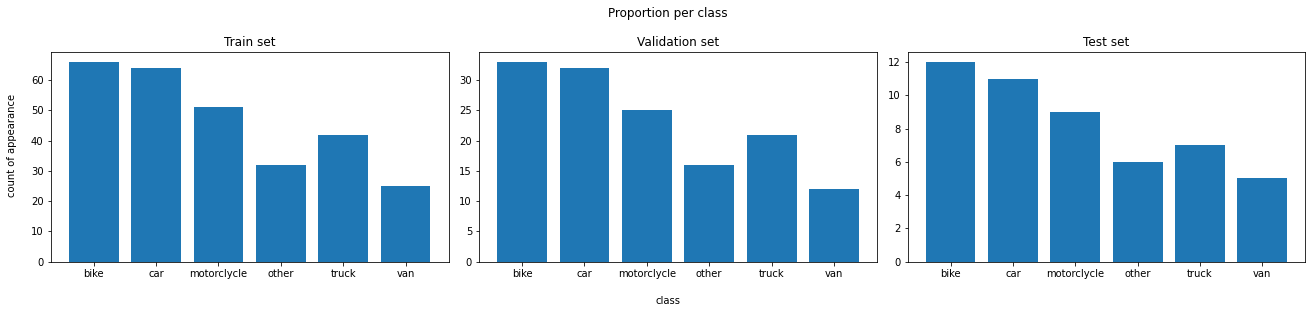

In [14]:
#plot proportions per class
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# tick labels
ticks=[0, 1, 2, 3, 4, 5]
labels=["bike", "car", "motorclycle", "other", "truck", "van"]

# Count of proportions
trainlabels, trainvalues = zip(*Counter(trainset.classes).items())
validlabels, validvalues = zip(*Counter(validset.classes).items())
testlabels, testvalues = zip(*Counter(testset.classes).items())

indexes = np.arange(len(trainlabels))
width = 0.8

# Plot train set
ax1.bar(indexes, trainvalues, width)
ax1.set_title("Train set") 
plt.setp(ax1, xticks=ticks, xticklabels=labels)

# plot validation set
ax2.bar(indexes, validvalues, width)
ax2.set_title("Validation set") 
plt.setp(ax2, xticks=ticks, xticklabels=labels)

# plot test set
ax3.bar(indexes, testvalues, width)
ax3.set_title("Test set") 
plt.setp(ax3, xticks=ticks, xticklabels=labels)

# labels & title
fig.text(0.5, -0.05, 'class', ha='center')
fig.text(-0.01, 0.5, 'count of appearance', va='center', rotation='vertical')
fig.suptitle("Proportion per class")

plt.tight_layout()
plt.show()

## Taks 4: Plot color histogram (optional)

For each of the 6 categories in the training dataset, plot the color histogram. For colored RGB images, as in our case, the color histogram shows the statistics of the three colors (red, green, and blue) as a function of their intensities in a given image or dataset. You are required to produce 6 such plots, each one should represent the statistics of three colors in all the images belonging to a specific category. What can you comment on these histograms? Do you spot distinctive pattern(s) in them across the different categories? Do you think such statistics are enough to distinguish the 6 categories?

In [15]:
from skimage import io

nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)

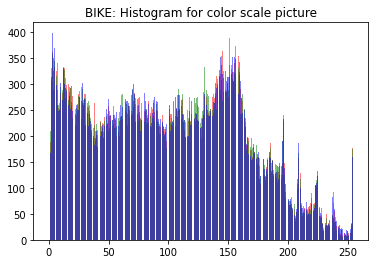

In [16]:
root = 'resources/swissroads/train/bike/'
for image in os.listdir(root):  
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.5)
plt.bar(bins[:-1], count_g, color='g', alpha=0.5)
plt.bar(bins[:-1], count_b, color='b', alpha=0.5)
plt.title('BIKE: Histogram for color scale picture')
plt.show();

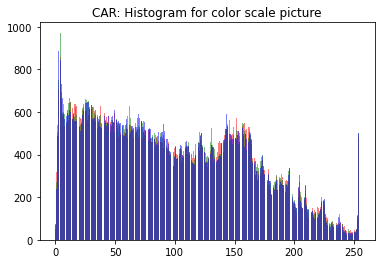

In [17]:
root = 'resources/swissroads/train/car/'
for image in os.listdir(root):  
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.5)
plt.bar(bins[:-1], count_g, color='g', alpha=0.5)
plt.bar(bins[:-1], count_b, color='b', alpha=0.5)
plt.title('CAR: Histogram for color scale picture')
plt.show();

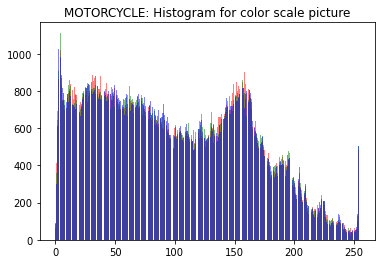

In [18]:
root = 'resources/swissroads/train/motorcycle/'
for image in os.listdir(root):  
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.5)
plt.bar(bins[:-1], count_g, color='g', alpha=0.5)
plt.bar(bins[:-1], count_b, color='b', alpha=0.5)
plt.title('MOTORCYCLE: Histogram for color scale picture')
plt.show();

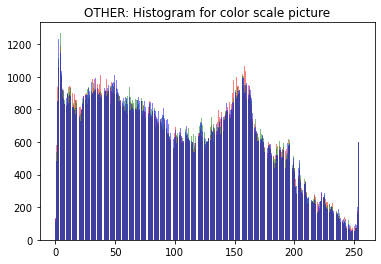

In [19]:
root = 'resources/swissroads/train/other/'
for image in os.listdir(root):  
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.5)
plt.bar(bins[:-1], count_g, color='g', alpha=0.5)
plt.bar(bins[:-1], count_b, color='b', alpha=0.5)
plt.title('OTHER: Histogram for color scale picture')
plt.show();

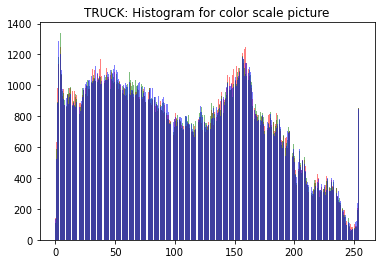

In [20]:
root = 'resources/swissroads/train/truck/'
for image in os.listdir(root):  
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.5)
plt.bar(bins[:-1], count_g, color='g', alpha=0.5)
plt.bar(bins[:-1], count_b, color='b', alpha=0.5)
plt.title('TRUCK: Histogram for color scale picture')
plt.show();

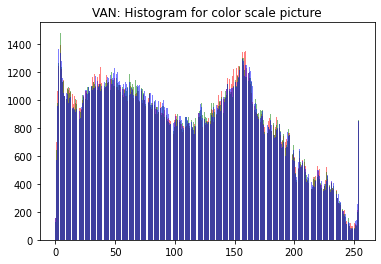

In [21]:
root = 'resources/swissroads/train/van/'
for image in os.listdir(root):  
    x = io.imread(root+image)
    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
    count_r += hist_r[0]
    count_g += hist_g[0]
    count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.bar(bins[:-1], count_r, color='r', alpha=0.5)
plt.bar(bins[:-1], count_g, color='g', alpha=0.5)
plt.bar(bins[:-1], count_b, color='b', alpha=0.5)
plt.title('VAN: Histogram for color scale picture')
plt.show();

_Consideration: The histograms look very similar to me. The y-axis is of different scale for the different classes. There is a clear pattern, with a very small peak at both ends of the x-axis and a bigger peak at about 150. After this peak the values are dropping. I do not think that such statistics are enough to distinguish the 6 categories._

## Task 5: High-level features

Extract the c for all the images in the three datasets using MobileNet v2. Consider storing the extracted high-level features, e.g. in npz files, for quickly reloading them into each of the following notebooks.

In [22]:
# import commands
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [23]:
# Create the image feature extractor
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

feature_extractor = hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)

OSError: SavedModel file does not exist at: /var/folders/ll/k84t91dd58b2j3_zhs26079w0000gp/T/tfhub_modules/5a2fc00b609485c742fba2c65fadaca6c99a835c/{saved_model.pbtxt|saved_model.pb}

### trainset

In [ ]:
# Create batches of the trainset
tr_batch_imgs, tr_batch_labels = trainset.next()

print("Batch images:", tr_batch_imgs.shape)
print("Data type:", tr_batch_imgs.dtype)
print("Batch labels:", tr_batch_labels.shape)

In [ ]:
# Extract features
tr_features = feature_extractor(tr_batch_imgs)
tr_features.shape

In [ ]:
# distribution of trainset features

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(tr_features[0].numpy(), bins=30)
plt.title("Image high-level feature distribution")
plt.show()

### testset

In [ ]:
# Create batches of the testset
te_batch_imgs, te_batch_labels = testset.next()

print("Batch images:", te_batch_imgs.shape)
print("Data type:", te_batch_imgs.dtype)
print("Batch labels:", te_batch_labels.shape)

In [ ]:
# Extract features
te_features = feature_extractor(te_batch_imgs)
te_features.shape

In [ ]:
# distribution of testset features

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(te_features[0].numpy(), bins=30)
plt.title("Image high-level feature distribution")
plt.show()

### validset

In [ ]:
# Create batches of the validset
vl_batch_imgs, vl_batch_labels = validset.next()

print("Batch images:", vl_batch_imgs.shape)
print("Data type:", vl_batch_imgs.dtype)
print("Batch labels:", vl_batch_labels.shape)

In [ ]:
# Extract features
vl_features = feature_extractor(vl_batch_imgs)
vl_features.shape

In [ ]:
# distribution of validset features

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(vl_features[0].numpy(), bins=30)
plt.title("Image high-level feature distribution")
plt.show()

### Save features into .npz

In [ ]:
# Save train features into a .npz file
np.savez("train_features.npz", 
         tr_features=tr_features)

In [ ]:
# Save train batch into a .npz file
np.savez("train_batch.npz", 
         tr_batch_imgs=tr_batch_imgs, 
         tr_batch_labels=tr_batch_labels)

In [ ]:
# Save test features into a .npz file
np.savez("test_features.npz", 
         te_features=te_features)

In [ ]:
# Save test batch into a .npz file
np.savez("test_batch.npz", 
         te_batch_imgs=te_batch_imgs, 
         te_batch_labels=te_batch_labels)

In [ ]:
# Save validation features into a .npz file
np.savez("valid_features.npz", 
         vl_features=vl_features)

In [ ]:
# Save validation batch into a .npz file
np.savez("valid_batch.npz", 
         vl_batch_imgs=vl_batch_imgs, 
         vl_batch_labels=vl_batch_labels)

### Load train features and batches

In [ ]:
# Load the train features npz file
with np.load("train_features.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_features=tr["tr_features"]

In [ ]:
# Load the train batch npz file
with np.load("train_batch.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_batch_imgs=tr["tr_batch_imgs"], 
    tr_batch_labels=tr["tr_batch_labels"]

## Task 6: Feature intensity per category (optional)

For each of the 6 categories in the training dataset, use a heatmap to visualize the intensity of the 1280 features for all the samples belonging to a specific category. Comment on your finding: Do the high-level features behave the same across the different categories?

In [ ]:
# check if the length is the same
len(tr_features) == len(tr_batch_labels)

In [ ]:
# labels and their number of occurance
np.unique(tr_batch_labels, return_counts=True)

In [ ]:
# create the 6 categories for the features
bike = tr_features[np.where(tr_batch_labels == 0)]
car = tr_features[np.where(tr_batch_labels == 1)]
motorcycle = tr_features[np.where(tr_batch_labels == 2)]
other = tr_features[np.where(tr_batch_labels == 3)]
truck = tr_features[np.where(tr_batch_labels == 4)]
van = tr_features[np.where(tr_batch_labels == 5)]

# check size
print("bike shape:", bike.shape)
print("car shape:", car.shape)
print("motorcycle shape:", motorcycle.shape)
print("other shape:", other.shape)
print("truck shape:", truck.shape)
print("van shape:", van.shape)

In [ ]:
# import command
import seaborn as sns; 
sns.set_theme()

In [ ]:
# plot the heatmaps
fig, axes = plt.subplots(2, 3,  figsize=(20,10))
fig.suptitle('Heatmap of feature intesity per category')

# Bike
sns.heatmap(bike, vmin=0.5, cmap="YlGnBu", yticklabels=5, xticklabels=100, ax=axes[0,0])
axes[0,0].set_title('Bike')
# Car
sns.heatmap(car, vmin=0.5, cmap="YlGnBu", yticklabels=5, xticklabels=100, ax=axes[0,1])
axes[0,1].set_title('Car')
# motorcycle
sns.heatmap(motorcycle, vmin=0.5, cmap="YlGnBu", yticklabels=5, xticklabels=100, ax=axes[0,2])
axes[0,2].set_title('Motorcycle')
# Other
sns.heatmap(other, vmin=0.5,  cmap="YlGnBu", yticklabels=5, xticklabels=100, ax=axes[1,0])
axes[1,0].set_title('Other')
# Truck
sns.heatmap(truck, vmin=0.5, cmap="YlGnBu", yticklabels=5, xticklabels=100, ax=axes[1,1])
axes[1,1].set_title('Truck')
# Van
sns.heatmap(van, vmin=0.5, cmap="YlGnBu", yticklabels=5, xticklabels=100, ax=axes[1,2])
axes[1,2].set_title('Van')

plt.show();

_Consideration: To me it looks like the  high-level features do not behave the same across the different categories._

## Task 7: Highest mean 

For each of the 6 categories in the training dataset, answer the following questions:
* What are the top 5 features that have the highest mean value?
* Which categories share the same most active feature (i.e. have highest means)?


In [ ]:
# top 5 means 

print("bike top 5 means:",np.sort(np.mean(bike, axis=0))[-5:])
print("car top 5 means:",np.sort(np.mean(car, axis=0))[-5:])
print("motorcycle top 5 means:",np.sort(np.mean(motorcycle, axis=0))[-5:])
print("other top 5 means:",np.sort(np.mean(other, axis=0))[-5:])
print("truck top 5 means:",np.sort(np.mean(truck, axis=0))[-5:])
print("van top 5 means:",np.sort(np.mean(van, axis=0))[-5:])

In [ ]:
# indeces of the top 5 features with the highest means

print("bike top 5 feature indeces:", np.argpartition(np.mean(bike, axis=0), -5)[-5:])
print("car top 5 feature indeces:", np.argpartition(np.mean(car, axis=0), -5)[-5:])
print("motorcycle top 5 feature indeces:", np.argpartition(np.mean(motorcycle, axis=0), -5)[-5:])
print("other top 5 feature indeces:", np.argpartition(np.mean(other, axis=0), -5)[-5:])
print("truck top 5 feature indeces:", np.argpartition(np.mean(truck, axis=0), -5)[-5:])
print("van top 5 feature indeces:", np.argpartition(np.mean(van, axis=0), -5)[-5:])

_Oberservation:_
* _Bike and car have the same feature within the top 5 highest means: The feature with the index 183._
* _Other and truck have the same feature within the top 5 highest means: The feature with the index 580._
* _Truck and van have the same feature within the top 5 highest means: The feature with the index 1022._